# 📘 Trustworthy AI and Data Analysis - Phase 1

# **UCI Heart Disease**
### Student: Oumaima Jribi

# Introduction

The dataset selected for this analysis is the Heart Disease Dataset, which contains a collection of medical attributes used to predict the presence or absence of heart disease in patients.

The task at hand is to develop a predictive model that can identify patients at risk for heart disease based on some clinical features. The approach will begin by applying a white-box model, such as a decision tree, which provides clear interpretability of the decision-making process. This will be followed by the application of a black-box model, likely a neural network, which, while more powerful, lacks transparency in its decision-making process. The goal is to compare the performance and interpretability of these models to provide both accurate predictions and actionable insights.

## Dataset and Problem Definition

**Dataset**: Heart Disease UCI Dataset  
**Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease)

**Problem Statement**:  
We aim to predict the presence of heart disease based on patient medical attributes. This is a **binary classification** task where the target variable `num` indicates presence (1–4) or absence (0) of heart disease.


### Loading the dataset
The dataset is readily available in the UCI website.
The code above is provided by the website to directly download the dataset.

The dataset is dowloaded in the form of a dotdict.
Features and target variable are extracted seperately then combined in one dataframe for easier manipulation.
We begin by loading the dataset and displaying the first few rows to examine the structure of the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
type(heart_disease)

ucimlrepo.dotdict.dotdict

In [ ]:
df = pd.merge(X, y, left_index=True, right_index=True)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# metadata
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'ID': 231,
  'type': 'NATIVE',
  'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detr

**Variable information is already available within the downloaded dataset but we will go more in detail with each feature**

In [ ]:
# variable information
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the hospital),mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to rest,None,no


In [ ]:
y['num'].unique()

array([0, 2, 1, 3, 4])

**Although the target variable contains values from 0 to 4, all experiments with this database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0) of a heart disease.**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# dimensions
df.shape

(303, 14)

### Inspecting the dataset
The `df.info()` method gives an overview of the dataset, including the data types of each column and the count of non-null values.
This helps us identify any missing data or incorrect data types that need to be addressed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


### Describing Each Attribute

1. **age**: Age of the patient in years.
2. **sex**: Gender: `male` or `female`.
5. **cp (chest Pain Type)**: Chest pain experienced by the patient:
   - `1` **typical angina**: chest pain typical for heart disease.
   - `2` **atypical angina**: chest pain that doesn't fit typical patterns.
   - `3` **non-anginal**: chest pain that is not associated with heart disease.
   - `4` **asymptomatic**: no chest pain.
6. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
7. **chol**: serum cholesterol in mg/dl
8. **fbs (Fasting Blood Sugar)**: whether the patient has high fasting blood sugar (> 120 mg/dl). It is a binary variable with `True` or `False` values.
9. **restecg (Resting Electrocardiographic Results)**: represents the results of an ECG (electrocardiogram) taken at rest. Possible values are:
   - `0` **normal**: normal heart rhythm.
   - `1` **st-t abnormality**: abnormal ECG results indicating potential issues.
   - `2` **lv hypertrophy**: left ventricular hypertrophy.
10. **thalch**: maximum heart rate achieved
11.  **exang (Exercise-Induced Angina)**: indicates whether the patient experiences angina (chest pain) during exercise. It is a binary variable with values:
   - `1` **True**: the patient experiences angina.
   - `0` **False**: no angina during exercise.
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope (Slope of Peak Exercise ST Segment)**: This represents the slope of the ST segment during exercise testing. The values are:
   - `1` **upsloping**: indicates an upward slope.
   - `2` **flat**: indicates a flat slope.
   - `3` **downsloping**: indicates a negative slope.
11. **ca (Number of Major Vessels Colored)**: indicates the number of major vessels that were colored by fluoroscopy: 0-3
12. **thal (Thalassemia)**: indicates the presence of thalassemia (a blood disorder that causes your blood to have less hemoglobin than normal). It can take values such as:
   - `3` **normal**: normal result.
   - `6` **fixed defect**
   - `7` **reversible defect**
13. **num (Target Variable)**: This is the target variable, which indicates whether the patient has heart disease. The values are:
   - `0`: No heart disease
   - `1`: Mild heart disease
   - `2`: Moderate heart dicease
   - `3`: Severe heart decease
   - `4`: Crttical heart disease
   
By analyzing the value distributions of each attribute, we can plan for their conversion (for categorical attributes) or handle missing values.

For this dataset, all categorical features are readily available in numerical format., so there is no need to map these values.
### Next Steps:
**Handle missing values** only for `ca` and `thal` features. Since there are only 4 and 2 missing values from these columns respectively, we will just fill them by 0.

After these preprocessing steps, the dataset will be ready for profiling and exploratory data analysis, then model building.

After that, we will visualize the relationships between the features and begin forming hypotheses for further analysis.

In [ ]:
df['ca'] = df['ca'].fillna(0)
df['thal'] = df['thal'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


### Exploratory Data Analysis (EDA)
We start EDA by examining the **summary statistics** of the dataset (e.g., mean, standard deviation, min, max, etc.) using `df.describe()`.
Next, we visualize the **correlation** between the numerical variables using a **correlation heatmap** to understand their relationships.
This helps in identifying patterns or dependencies between features that might be important for model building.

In [ ]:
# Summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


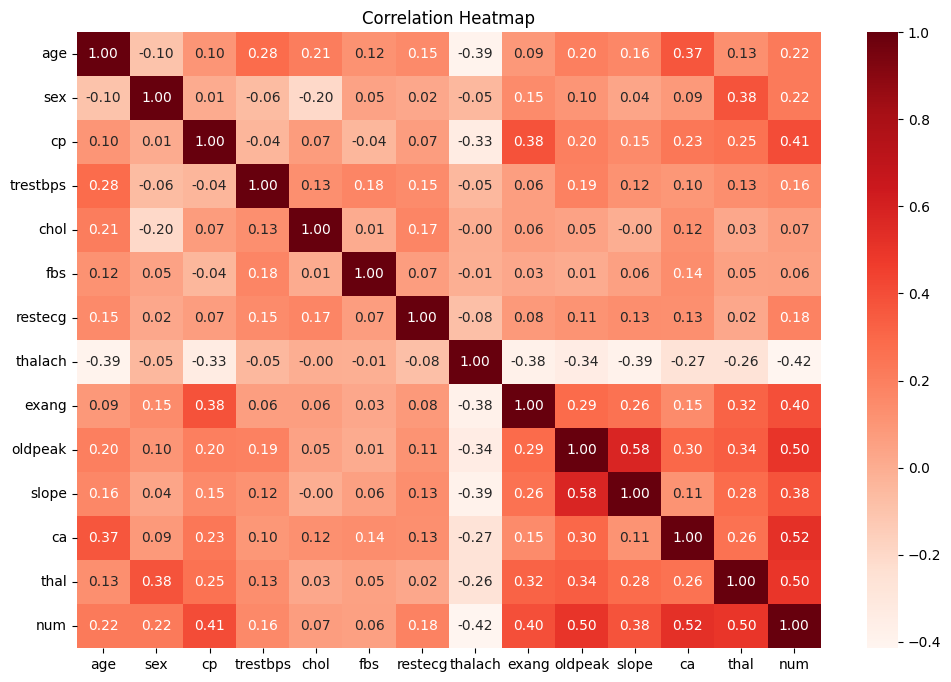

In [ ]:
# Correlation heatmap to check relationships between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Observations:
### **High correlation with target variabe:**
* **cp (Chest Pain Type)**: +0.41, indicating more severe chest pain types are associated with heart disease.

* **thalch (Maximum Heart Rate)**: -0.42, suggesting lower heart rates during exercise are linked to heart disease.

* **exang (Exercise-Induced Angina)**: Strong positive correlation +0.51, indicating that the presence of exercise-induced angina is closely associated with heart disease.

* **oldpeak (ST Depression)**: +0.40, showing that higher ST depression during exercise is more likely to be associated with the presence of heart disease.

* **ca (Number of Vessels Affected)**: +0.38, indicating that a higher number of affected vessels is associated with more severe heart disease.

* **thal (Thalassemia)**: +0.31, showing a connection between abnormal thalassemia values and heart disease.

* **age and sex**: +0.22, moderate positive correlation that might indicate that men are more likely to have heart disease and that elderly people are more likely to be diagnosed with heart disease.

### These are mere assumptions and will be further tested and confirmed during the modeling part.

### **Weak or no correlation with target variable**
1. **chol (cholesterol)**: +0.07, Surprisingly weak correlation. Cholesterol alone doesn't indicate heart disease in this dataset.

2. **fbs, trestbps, restecg** show weak correlations with the target variable, suggesting that individually, they may have limited predictive power for detecting heart disease in this dataset. However their interactions with other variables might have an effect on the target variable, so this observation does not mean that they should be excluded from analysis or modeling.

## **Notable inter-feature correlations**
* There are several high negative correlations between **thalch (maximum heart rate) and features such as age (-0.39), cp (-0.33), exang (-0.38), oldpeak (-0.34), ca (-0.27), slope (-0.27), and thal (-0.26)**. These negative correlations suggest that as these factors worsen (e.g., older age, more severe chest pain, exercise-induced angina, more affected vessels, or ST depression), the patient's ability to achieve a higher heart rate during exercise decreases. This aligns with medical expectations, as heart disease tends to impair the cardiovascular system, limiting exercise capacity and heart rate response.

* **cp and exang → +0.38:** This suggests that patients with more severe chest pain are also more likely to experience angina during exercise — which aligns with clinical expectations.

* **thal and sex → +0.38:** This high correlation suggests that Thalessemia has comparatively higher prevalence in male gender. This has also been proven by some studies, see: http://doi.org/10.26692/sujo/2018.01.0021




# Data Profiling:
### In the following section we perform data profiling on the dataset after making the needed transformations and treating the null values.

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=842fe6186b53e9307f62a206265cd7c1feaa4ca76620ecf8ce80823062feb958
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="UCI Heart Disease Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 64.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Observations from the profiling report:
* The overview section shows no abnormalities.
* The alerts section shows 1 alert regarding how oldpeak has 99 (32.7%) zeros, but that's a noraml observation and it indicates that these individuals **had no ST depression during exercise, indicating that the heart is responding normally to the physical stress, with no signs of ischemia (lack of oxygen).**

## Feature Observations: (mostly for originally categorical variables)
* **age**: The age range (29–77 years) is typical for this dataset, suggesting a mix of younger and older patients. In addition, the histogram shows a close to normal distribution,
* **sex**: there is a male prevalence in this dataset, representing up to 67% of the patients. Conclusions regarding the effect of gender should be drawn cautiously.
* **cp**: dominated by category 4, which represents asymptotic pain. **This might seem counterintuitive**, as we observed a high correlation of 0.41 between cp and the target variable we would expect that this variable would be dominated by the other types of chest pain and not the "asymptomatic" one. This needs to be further investigated when modeling.
* **fbs**: fasting blood sugar is dominated with 0 values, which correspond to False, explaining the weak correlation of 0.06 between fbs and the target variable, as we would normally expect patients diagnosed with heart disease to have high blood sugar levels.
* **restecg**: Resting Electrocardiographic Results are dominated mostly by "normal" and "lv hypertrophy", we will see later if these results have an effect on the heart disease diagnosis.
* **exang**: dominated by 0 value which corresponds to False.
* **slope**: slope of the peak induced by exercice. It is almost equally distributed between downsloping and flat.
* **ca**: despite being dominated by values of 0, indicating that no vessels were identified as affected, it still has a high correlation with the target variable. This further encourages the belief that this variable can be a good predictor for heart disease diagnosis.
* **thal**: despite being dominated by values of 3, indicating "normal" state, it still has high correlation with the target variable, indicating the importance of this feature in predicting heart disease.
* **num: the target variable**: it is dominated by 0 indicating no heart disease. In further analysis, values 1-4 will treated equallly as corresponding to the existance of heart disease.

## Variable Interactions: (Scatter plots)
The graphs that give most information are those of the different features against age. We can see that characteristics like **trestbps (resting blood pressure), chol (cholesterol levels)** the graph shows a slight positive slope, indicating that older people are more likely to experience these issues.

Whereas **thalach (max heart rate acheived)** the graph shows a negative slope, indicating that younger people tend to acheive higher heart rates.